# 0. 라이브러리 임포트

In [1]:
import numpy
import pandas

import statsmodels.api

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 시각화 관련 설정

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"] = (50, 30)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [3]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

# 2. 데이터 로딩

In [4]:
df_base = pandas.read_csv('data-0201-base.csv')
display(df_base)

,기준일자,KOSPI지수-종가,A005930-삼성전자-시가,A005930-삼성전자-종가,A000660-SK하이닉스-시가,A000660-SK하이닉스-종가,A006400-삼성SDI-시가,A006400-삼성SDI-종가,A005380-현대차-시가,A005380-현대차-종가,...,A005490-POSCO홀딩스-시가,A005490-POSCO홀딩스-종가,A012330-현대모비스-시가,A012330-현대모비스-종가,A015760-한국전력-시가,A015760-한국전력-종가,A033780-KT&G-시가,A033780-KT&G-종가,A003550-LG-시가,A003550-LG-종가
0,20010102,520.95,3160.0,3350.0,76556.0,89118.0,47500.0,47500.0,11900.0,11700.0,...,76000.0,76500.0,4500.0,4495.0,24000.0,24300.0,18200.0,18200.0,12899.0,13017.0
1,20010103,521.43,3229.0,3370.0,86174.0,89511.0,47100.0,47600.0,11500.0,11900.0,...,76200.0,77300.0,4520.0,4440.0,23900.0,23900.0,18200.0,18000.0,12899.0,13603.0
2,20010104,558.02,3790.0,3780.0,102859.0,102859.0,50400.0,49400.0,12900.0,12750.0,...,88000.0,83500.0,4600.0,4500.0,25000.0,25050.0,18400.0,18050.0,14600.0,14659.0
3,20010105,580.85,3760.0,3900.0,105019.0,118170.0,49400.0,51500.0,13200.0,13650.0,...,83500.0,86500.0,4505.0,4720.0,25050.0,26000.0,18050.0,17600.0,14190.0,15831.0
4,20010108,586.65,3820.0,3880.0,117778.0,120525.0,50900.0,51500.0,13400.0,14150.0,...,84000.0,86200.0,4560.0,4720.0,25650.0,25850.0,17700.0,17750.0,15596.0,16066.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,20221223,2313.69,58200.0,58100.0,77800.0,77800.0,626000.0,622000.0,157000.0,157000.0,...,285000.0,288500.0,206000.0,206500.0,21600.0,21900.0,97000.0,96400.0,80500.0,82100.0
5433,20221226,2317.14,58000.0,57900.0,77700.0,77000.0,618000.0,624000.0,157000.0,158000.0,...,289500.0,292000.0,206000.0,209500.0,22000.0,21700.0,96000.0,95400.0,81500.0,81400.0
5434,20221227,2332.79,58000.0,58100.0,77500.0,77000.0,628000.0,624000.0,158500.0,158000.0,...,293000.0,292000.0,210000.0,210000.0,21750.0,21500.0,95800.0,95100.0,82700.0,81900.0
5435,20221228,2280.45,57600.0,56600.0,76800.0,76000.0,617000.0,603000.0,156000.0,154000.0,...,290500.0,291000.0,206500.0,207000.0,21700.0,22450.0,90200.0,91400.0,80000.0,79500.0


# 3. KOSPI 지수에 대한 국면전환 데이터 생성

### 3.1. 전체 구간 국면 확인

KOSPI지수-종가의 국면전환 확률데이터 생성


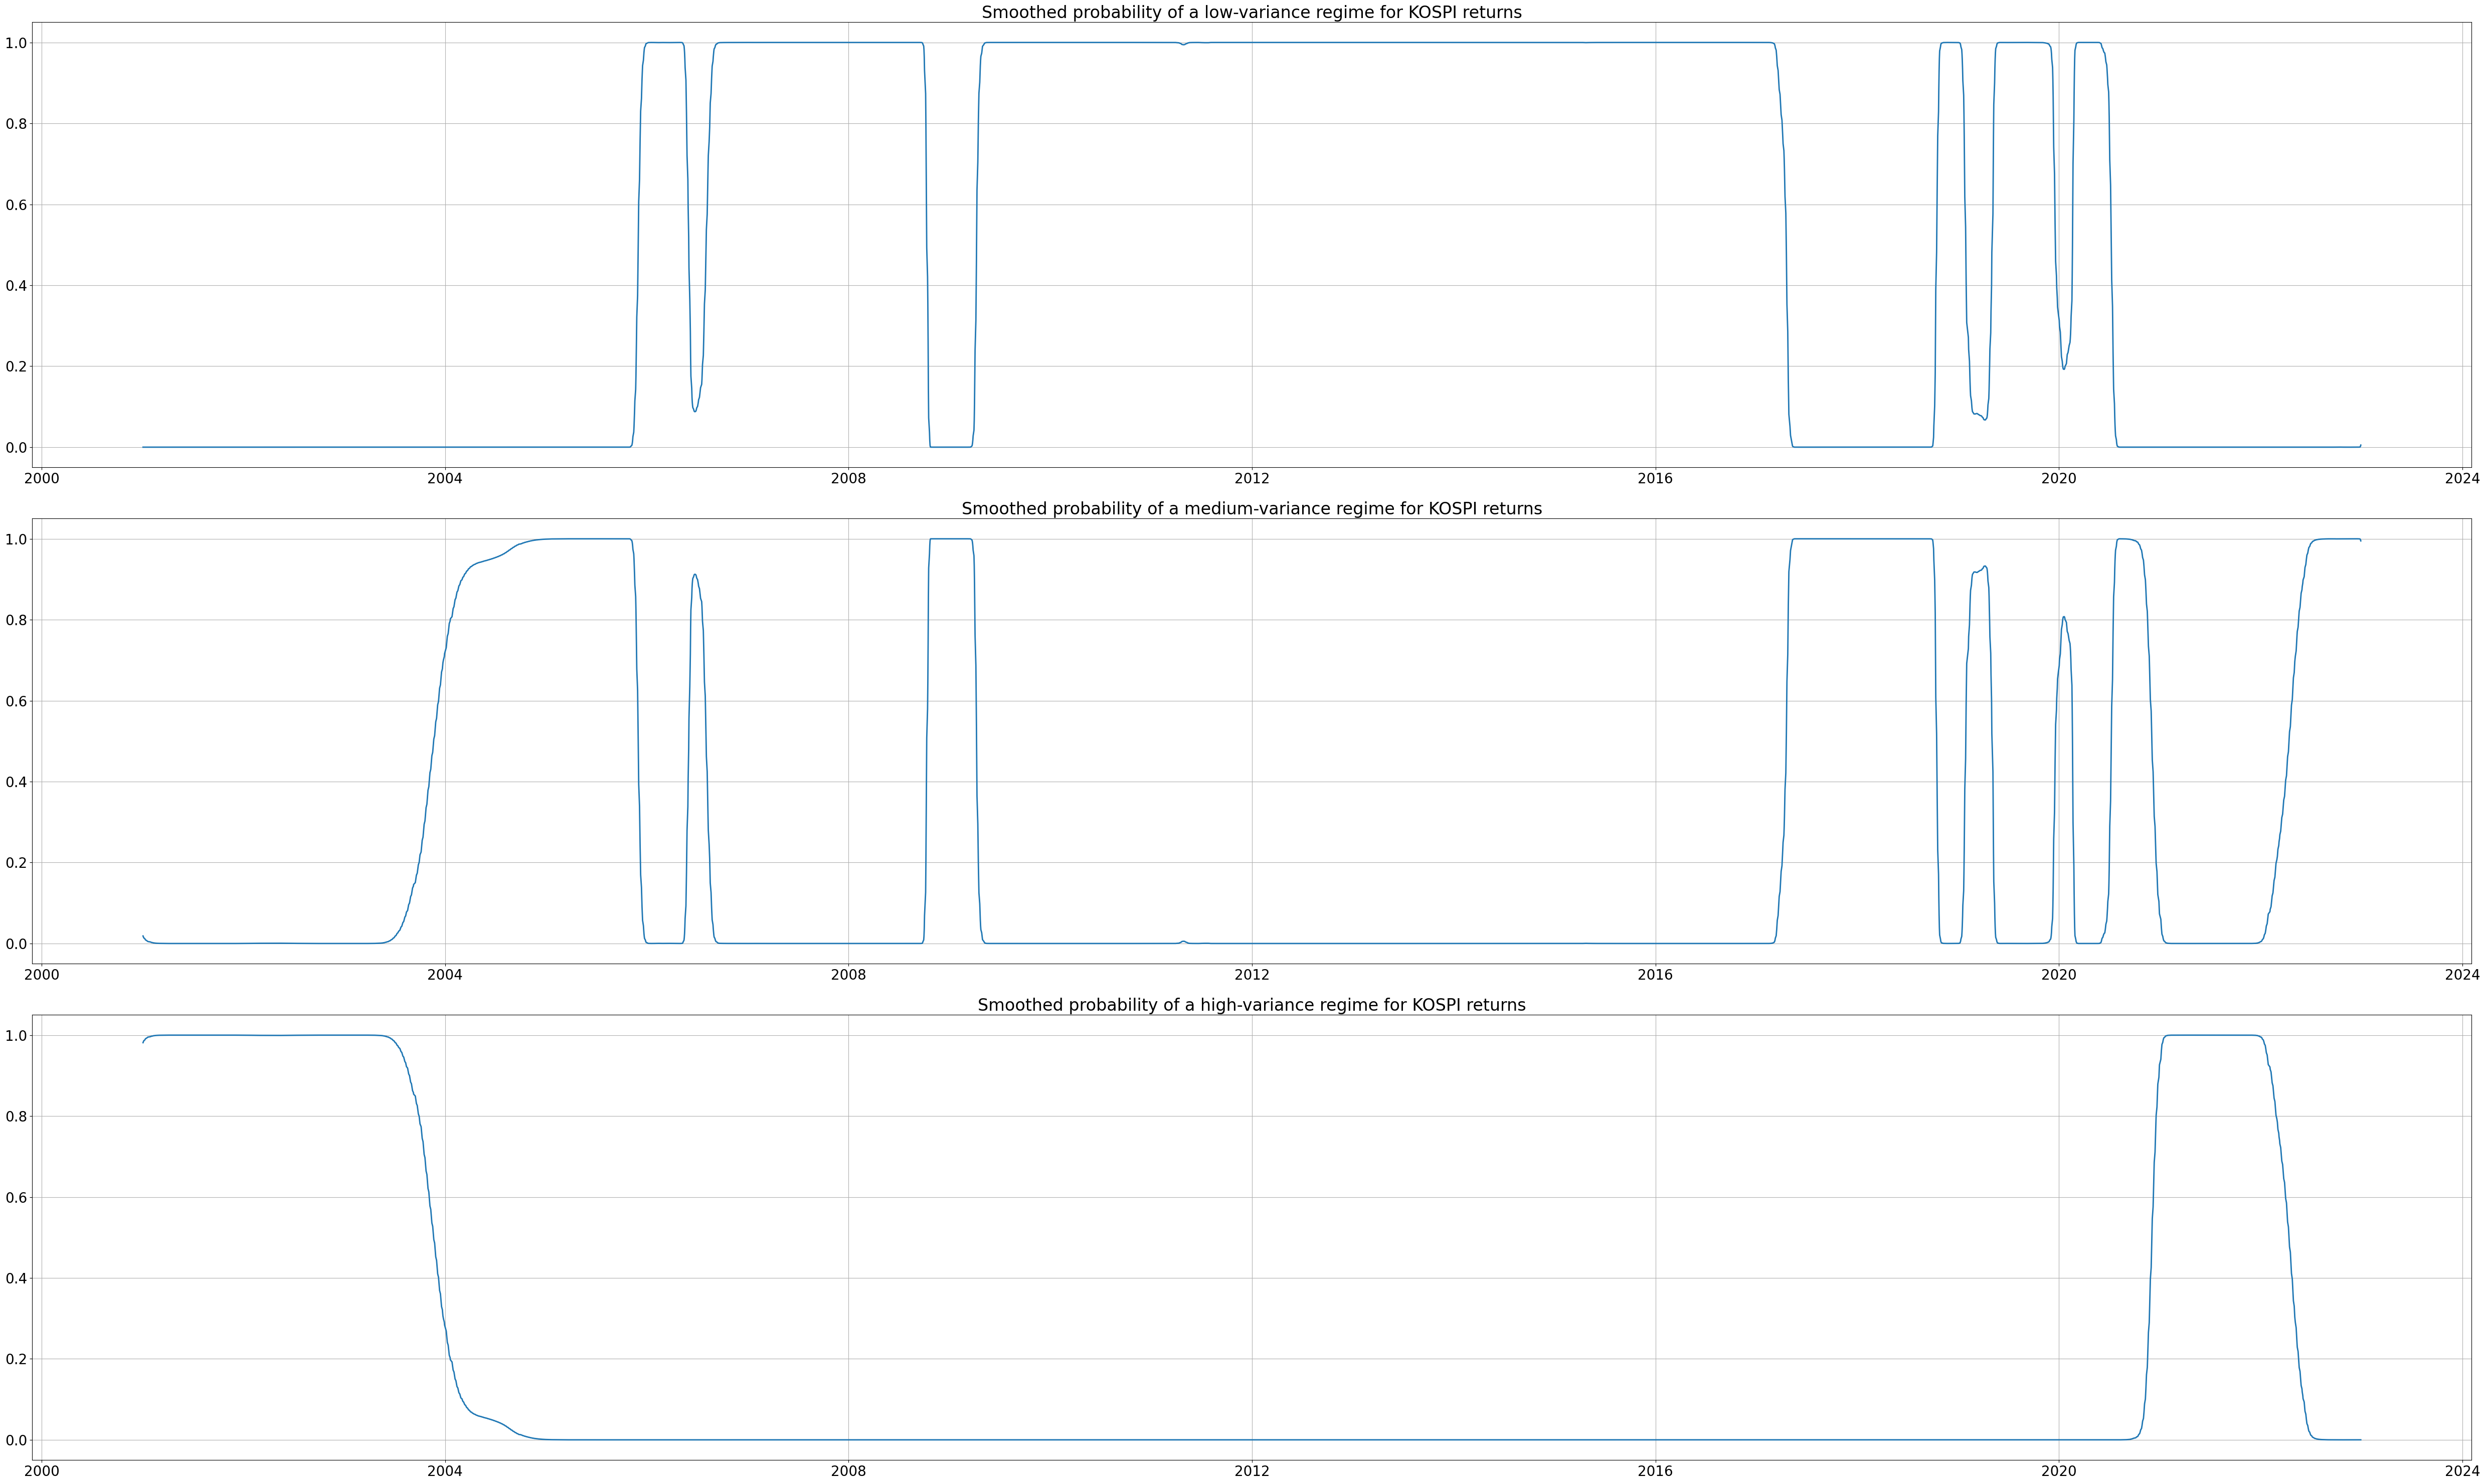

In [5]:
import warnings
warnings.filterwarnings('ignore')

df_regime = df_base[['기준일자', 'KOSPI지수-종가']]
print('KOSPI지수-종가의 국면전환 확률데이터 생성')
df_regime['ts'] = pandas.to_datetime(df_regime['기준일자'], format='%Y%m%d')
df_regime_input = df_regime[['ts', 'KOSPI지수-종가']]
df_regime_input = df_regime_input.set_index(['ts'])
df_regime_input['KOSPI지수-종가'] = df_regime_input['KOSPI지수-종가'] - numpy.mean(df_regime_input['KOSPI지수-종가'])
mod_kns = statsmodels.api.tsa.MarkovRegression(df_regime_input, k_regimes=3, trend='n', switching_variance=True)
res_kns = mod_kns.fit()

df_regime_plot = pandas.DataFrame(res_kns.smoothed_marginal_probabilities)
df_regime_plot.columns = ['KOSPI지수-종가-REGIME0', 'KOSPI지수-종가-REGIME1', 'KOSPI지수-종가-REGIME2']
fig, axes = plt.subplots(3)
ax = axes[0]
ax.plot(df_regime_plot['KOSPI지수-종가-REGIME0'])
ax.set(title="Smoothed probability of a low-variance regime for KOSPI returns")
ax = axes[1]
ax.plot(df_regime_plot['KOSPI지수-종가-REGIME1'])
ax.set(title="Smoothed probability of a medium-variance regime for KOSPI returns")
ax = axes[2]
ax.plot(df_regime_plot['KOSPI지수-종가-REGIME2'])
ax.set(title="Smoothed probability of a high-variance regime for KOSPI returns")
fig.tight_layout()

### 3.2. 최근 500일에 대한 국면전환 확률 데이터 생성
- Window size: 500 (window sliding)
- Duration: 2003/01/02 ~ 2022/12/29

KOSPI지수-종가의 국면전환 확률데이터 생성 20030102
KOSPI지수-종가의 국면전환 확률데이터 생성 20030103
KOSPI지수-종가의 국면전환 확률데이터 생성 20030106
KOSPI지수-종가의 국면전환 확률데이터 생성 20030107
KOSPI지수-종가의 국면전환 확률데이터 생성 20030108
KOSPI지수-종가의 국면전환 확률데이터 생성 20030109
KOSPI지수-종가의 국면전환 확률데이터 생성 20030110
KOSPI지수-종가의 국면전환 확률데이터 생성 20030113
KOSPI지수-종가의 국면전환 확률데이터 생성 20030114
KOSPI지수-종가의 국면전환 확률데이터 생성 20030115
KOSPI지수-종가의 국면전환 확률데이터 생성 20030116
KOSPI지수-종가의 국면전환 확률데이터 생성 20030117
KOSPI지수-종가의 국면전환 확률데이터 생성 20030120
KOSPI지수-종가의 국면전환 확률데이터 생성 20030121
KOSPI지수-종가의 국면전환 확률데이터 생성 20030122
KOSPI지수-종가의 국면전환 확률데이터 생성 20030123
KOSPI지수-종가의 국면전환 확률데이터 생성 20030124
KOSPI지수-종가의 국면전환 확률데이터 생성 20030127
KOSPI지수-종가의 국면전환 확률데이터 생성 20030128
KOSPI지수-종가의 국면전환 확률데이터 생성 20030129
KOSPI지수-종가의 국면전환 확률데이터 생성 20030130
KOSPI지수-종가의 국면전환 확률데이터 생성 20030203
KOSPI지수-종가의 국면전환 확률데이터 생성 20030204
KOSPI지수-종가의 국면전환 확률데이터 생성 20030205
KOSPI지수-종가의 국면전환 확률데이터 생성 20030206
KOSPI지수-종가의 국면전환 확률데이터 생성 20030207
KOSPI지수-종가의 국면전환 확률데이터 생성 20030210
KOSPI지수-종가의 국면전환 확률데이터 생성 20030211
KOSPI지수-종가의 국면전환 확률데

,KOSPI지수-종가-REGIME0,KOSPI지수-종가-REGIME1,KOSPI지수-종가-REGIME2,기준일자
ts,,,,
2002-12-30,0.989093,0.010873,0.000033,20030102
2003-01-02,0.989061,0.010902,0.000037,20030103
2003-01-03,0.991072,0.008654,0.000274,20030106
2003-01-06,0.992199,0.007699,0.000102,20030107
2003-01-07,0.989944,0.010045,0.000011,20030108
...,...,...,...,...
2022-12-22,0.000131,0.002563,0.997306,20221223
2022-12-23,0.000056,0.002761,0.997183,20221226
2022-12-26,0.000058,0.002723,0.997219,20221227


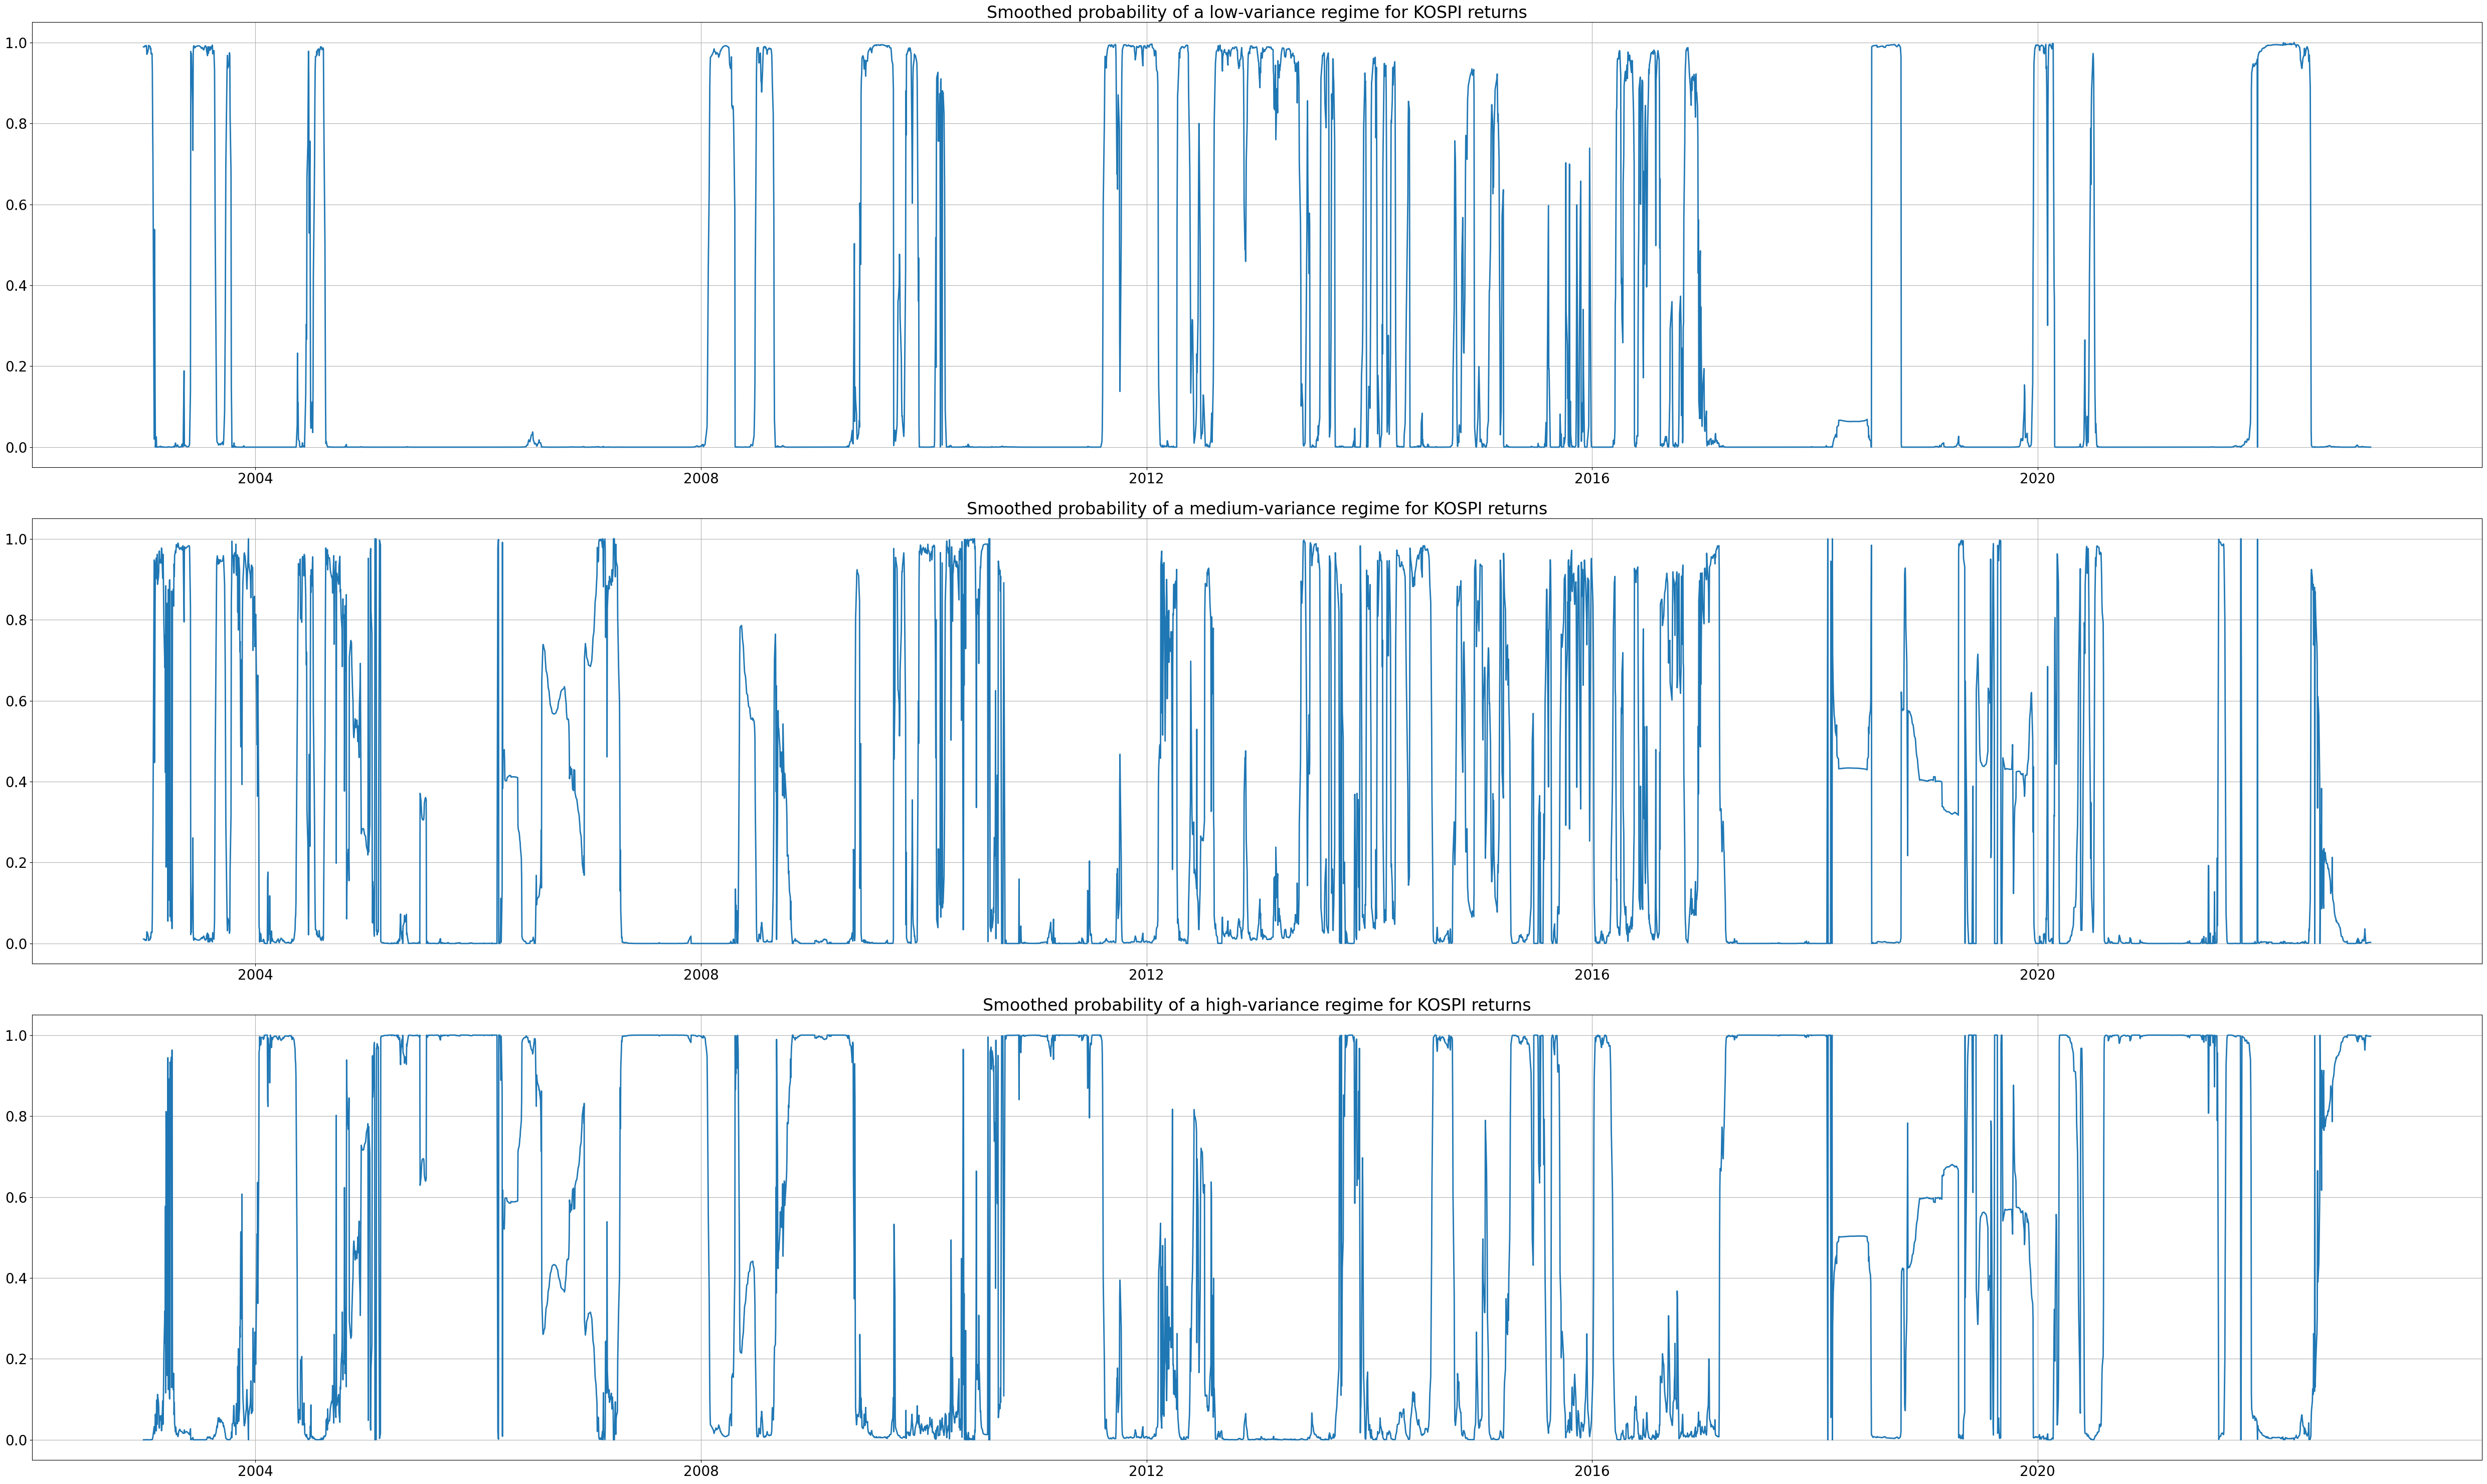

In [6]:
import warnings
warnings.filterwarnings('ignore')

window_size = 490
start_date = 20030101

df_regime = df_base[['기준일자', 'KOSPI지수-종가']]
df_days = df_regime[df_regime['기준일자'] > start_date]
list_days = df_days['기준일자'].tolist()
list_days.sort()

df_regime_merged = pandas.DataFrame()
for day in list_days:
    print('KOSPI지수-종가의 국면전환 확률데이터 생성', day)
    df_part = df_regime[df_regime['기준일자'] < day]
    df_part = df_part.tail(window_size)
    df_part['ts'] = pandas.to_datetime(df_part['기준일자'], format='%Y%m%d')
    df_regime_input = df_part[['ts', 'KOSPI지수-종가']]
    df_regime_input = df_regime_input.set_index(['ts'])
    df_regime_input['KOSPI지수-종가'] = df_regime_input['KOSPI지수-종가'] - numpy.mean(df_regime_input['KOSPI지수-종가'])
    mod_kns = statsmodels.api.tsa.MarkovRegression(df_regime_input, k_regimes=3, trend='n', switching_variance=True)
    res_kns = mod_kns.fit()

    df_regime_plot_window = pandas.DataFrame(res_kns.smoothed_marginal_probabilities)
    df_regime_plot_window.columns = ['KOSPI지수-종가-REGIME0', 'KOSPI지수-종가-REGIME1', 'KOSPI지수-종가-REGIME2']
    df_regime_last = df_regime_plot_window.tail(1)
    df_regime_last['기준일자'] = day
    df_regime_merged = pandas.concat([df_regime_merged, df_regime_last], sort=False)

display(df_regime_merged)
fig, axes = plt.subplots(3)
ax = axes[0]
ax.plot(df_regime_merged['KOSPI지수-종가-REGIME0'])
ax.set(title="Smoothed probability of a low-variance regime for KOSPI returns")
ax = axes[1]
ax.plot(df_regime_merged['KOSPI지수-종가-REGIME1'])
ax.set(title="Smoothed probability of a medium-variance regime for KOSPI returns")
ax = axes[2]
ax.plot(df_regime_merged['KOSPI지수-종가-REGIME2'])
ax.set(title="Smoothed probability of a high-variance regime for KOSPI returns")
fig.tight_layout()

In [7]:
df_regime_merged = df_regime_merged.set_index(['기준일자'])
df_regime_merged.to_csv('data-0203-markov.csv')